<a href="https://colab.research.google.com/github/Hemalatha10104/True_Fake-news-prediction/blob/main/Copy_of_hema_project_intern_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [ ]:
df=pd.read_csv('/content/Maternal Health Risk Data Set (1).csv')

# Data Preprocessing

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
df.isna().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


In [ ]:
df.shape

(1014, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# EDA


In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


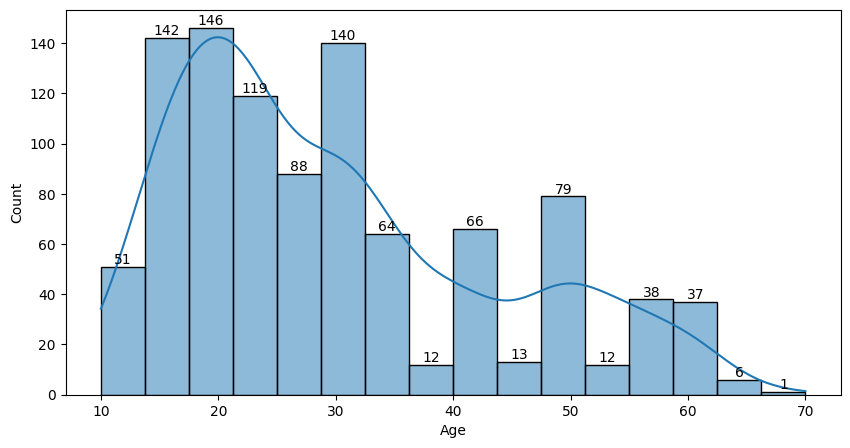

In [ ]:
# Age
plt.figure(figsize=(10,5))
axes = sns.histplot(data=df, x="Age", kde=True)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

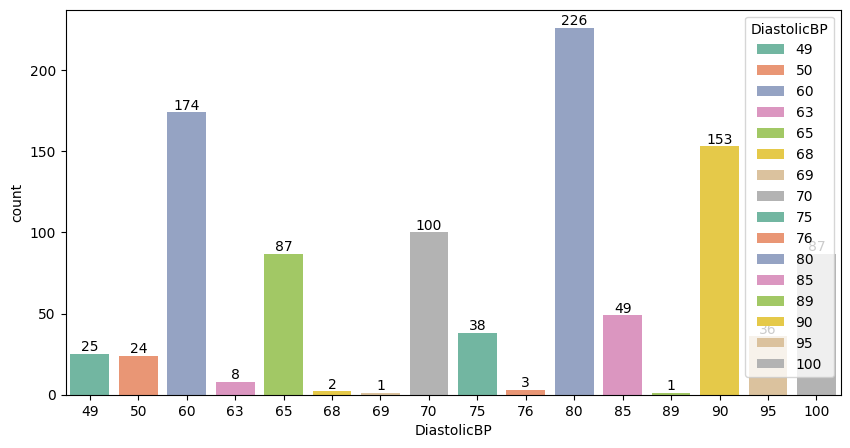

In [ ]:
# DiastolicBP
plt.figure(figsize=(10,5))
axes = sns.countplot(data=df, x="DiastolicBP", hue="DiastolicBP", palette="Set2")
for container in axes.containers:
    axes.bar_label(container)
plt.show()

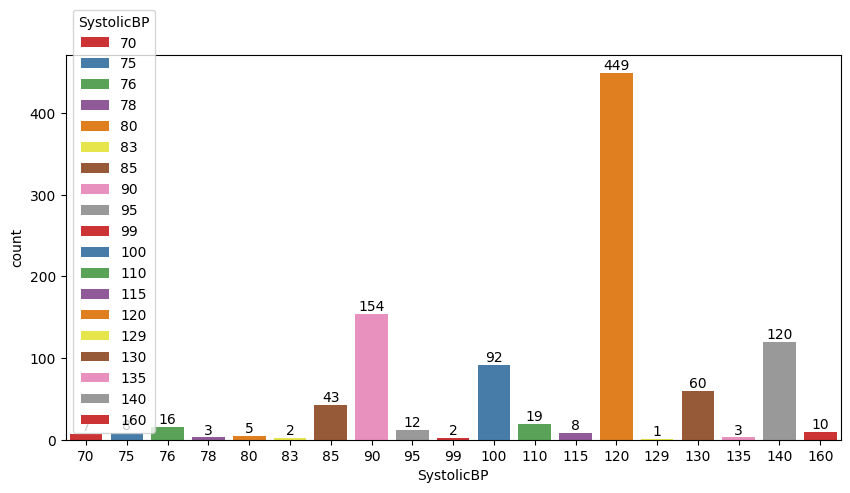

In [ ]:
# SystolicBP
plt.figure(figsize=(10,5))
axes = sns.countplot(data=df, x="SystolicBP", hue="SystolicBP", palette="Set1")
for container in axes.containers:
    axes.bar_label(container)
plt.show()

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


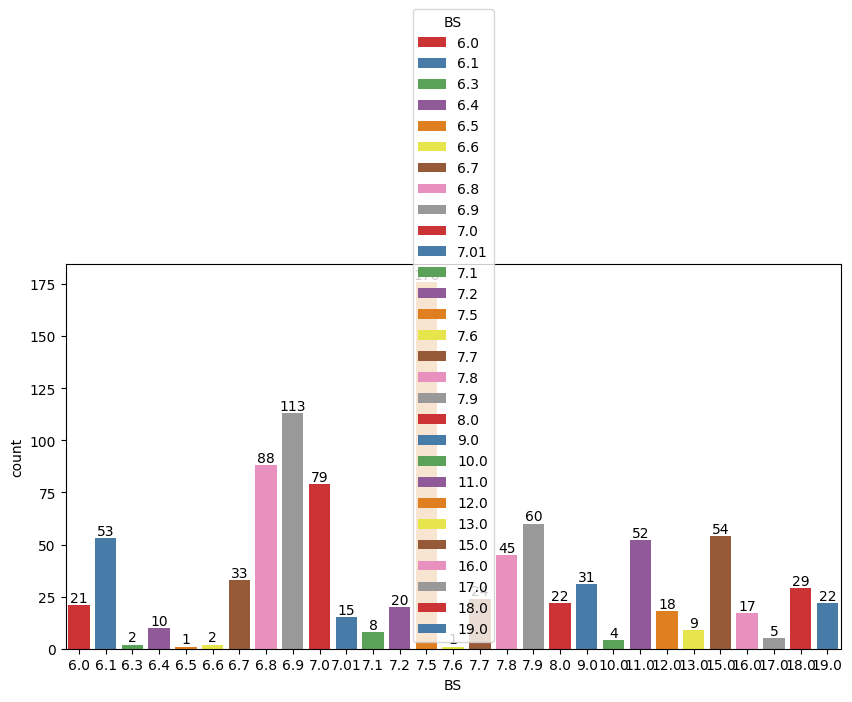

In [ ]:
# BS
plt.figure(figsize=(10,5))
axes = sns.countplot(data=df, x="BS", hue="BS", palette="Set1")
for container in axes.containers:
    axes.bar_label(container)
plt.show()

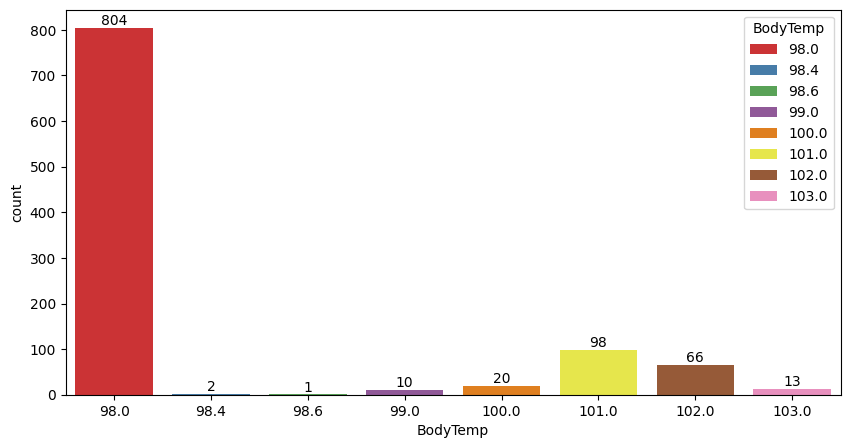

In [ ]:
#BodyTemp
plt.figure(figsize=(10,5))
axes = sns.countplot(data=df, x="BodyTemp", hue="BodyTemp", palette="Set1")
for container in axes.containers:
    axes.bar_label(container)
plt.show()

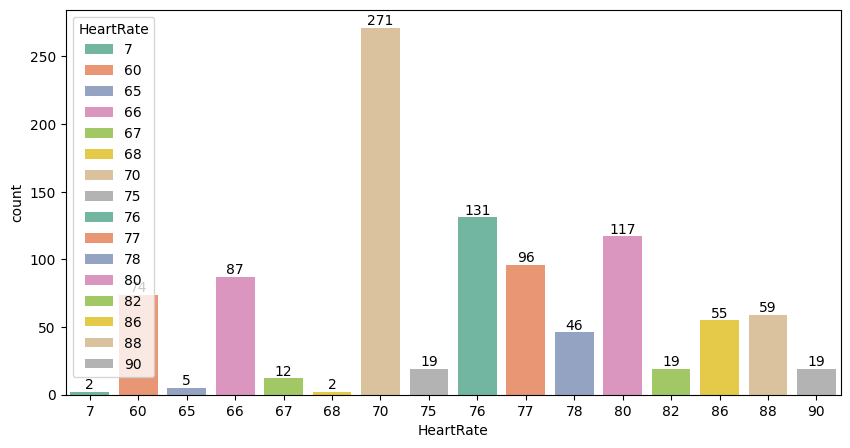

In [ ]:
#HeartRate
plt.figure(figsize=(10,5))
axes = sns.countplot(data=df, x="HeartRate", hue="HeartRate", palette="Set2")
for container in axes.containers:
    axes.bar_label(container)
plt.show()

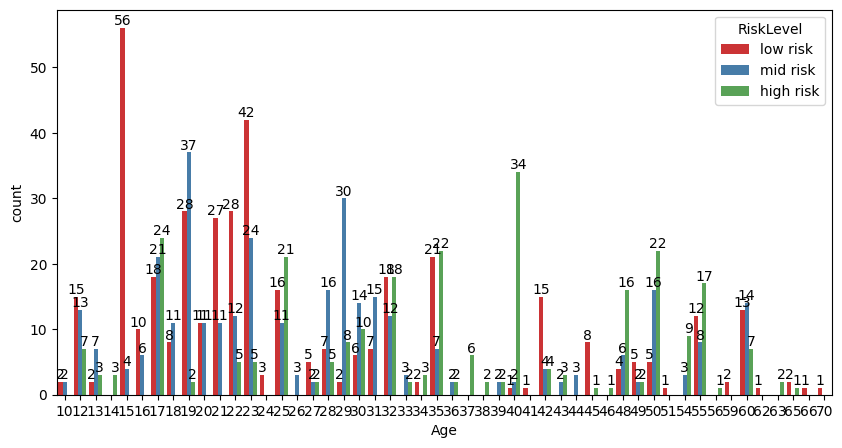

In [ ]:
#Age with our target
plt.figure(figsize=(10,5))
axes = sns.countplot(data=df, x="Age", hue="RiskLevel", palette="Set1")
for container in axes.containers:
    axes.bar_label(container)
plt.show()

# Feature Engineering:


In [ ]:
df['RiskLevel']=df['RiskLevel'].replace({'low risk':0,'mid risk':1,'high risk':2})

# Feature scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

<Axes: >

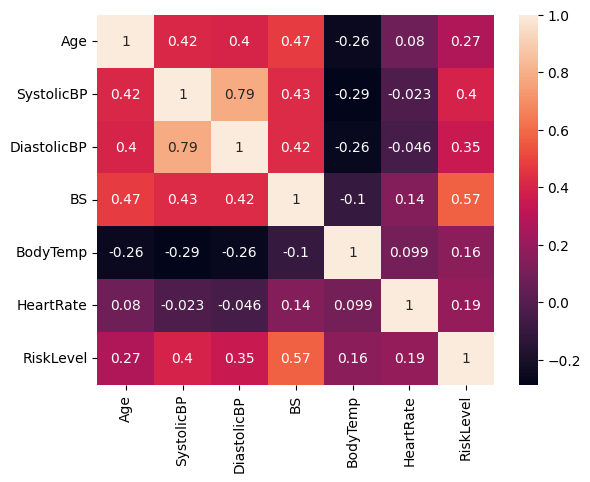

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# Feature Selection

In [ ]:
x=df.iloc[ : , :-1]
y=df.iloc[ : ,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x=np.array(x)
y=np.array(y)

In [ ]:
model=LogisticRegression(random_state=0)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
model_pred=model.predict(x_test)
model_pred

# Model evaluation

In [ ]:
#confused matrix
cm=confusion_matrix(y_test,model_pred)

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
accuracy=accuracy_score(y_test,model_pred)
print('Accuracy is:',accuracy)

In [ ]:
precision = precision_score(y_test, model_pred,average='weighted')
print("Precision : ", precision)

In [ ]:
f1 = f1_score(y_test, model_pred,average='weighted')
print("F1 Score : ", f1)

In [ ]:
recall = recall_score(y_test, model_pred,average='weighted')
print("Recall : ", recall)

In [ ]:
print(classification_report(y_test, model_pred))

NameError: name 'model_pred' is not defined

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


# Finetuning and feature scaling to improve performance

In [ ]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_train_poly, y_train)

# Feature selection using RFECV with RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
selector = selector.fit(x_res, y_res)
X_res_selected = selector.transform(x_res)
X_test_selected = selector.transform(x_test_poly)
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(x_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1_weighted')

In [ ]:
# Best model after GridSearch
best_model = grid_search.best_estimator_
#Evaluate
model_predd = best_model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,model_predd)
print('Accuracy is:',accuracy)

Accuracy is: 0.6305418719211823


In [ ]:
print(classification_report(y_test, model_predd, target_names=['low', 'mid', 'high']))

              precision    recall  f1-score   support

         low       0.55      0.90      0.69        80
         mid       0.71      0.29      0.41        76
        high       0.81      0.72      0.76        47

    accuracy                           0.63       203
   macro avg       0.69      0.64      0.62       203
weighted avg       0.67      0.63      0.60       203



# SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)

In [ ]:
#confused matrix
cm=confusion_matrix(y_test,y_pred)

<Axes: >

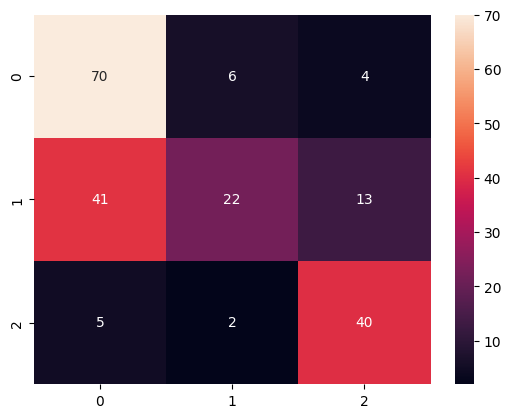

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy is:',accuracy)

Accuracy is: 0.6502463054187192


In [ ]:
f1 = f1_score(y_test, y_pred,average='weighted')
print("F1 Score : ", f1)

F1 Score :  0.6149944488080002


In [ ]:
df.isna().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0



Project Summary: Maternal Health Risk Prediction

 Overview

Maternal health is a vital component of public health, and timely prediction of maternal health risks can significantly improve outcomes for mothers and infants. This project aims to analyze maternal health data and develop a machine learning model to accurately predict the risk of maternal health complications.

 Objectives
 1. *Data Preprocessing*:
   - Clean and preprocess data to handle missing values, outliers, and categorical variables.
   - Perform descriptive statistics and visualize data to identify patterns and correlations.
   - Identify key features influencing maternal health risks.

2. *Feature Engineering*:
   - Create new features or modify existing ones to improve model performance.
   - Apply techniques like normalization, standardization, and scaling as needed.

3. *Model Building*:
   - Split the data into training and testing sets.
   - Build multiple machine learning models (e.g., logistic regression, support vector classifier) to predict maternal health risks.

4. *Model Evaluation and Selection*:
   - Compare the performance of different models.
   - Select the best-performing model based on evaluation metrics.
   - Fine-tune the selected model to optimize performance.

#### Dataset
The dataset consists of 1014 records with 7 attributes:
- *AGE*: Age of the mother.
- *SystolicBP*: Systolic blood pressure (maximum pressure during heart contraction).
- *DiastolicBP*: Diastolic blood pressure (minimum pressure between heartbeats).
- *BS (Blood Sugar)*: Glucose level in the blood.
- *BodyTemp*: Body temperature.
- *Heart rate*: Heartbeats per minute.
- *Risk level*: Risk level categorized as high, medium, or low.

#### Tasks and Deliverables
1. *Data Preprocessing*:
   - Clean and preprocess the data.
   - Conduct exploratory data analysis to uncover key insights.

2. *Feature Engineering*:
   - Develop new features and apply necessary transformations.

3. *Model Building*:
   - Implement various machine learning models.

4. *Model Evaluation and Selection*:
   - Evaluate models and select the best-performing one.

CONCLUSION

This project aims to leverage data science techniques to predict maternal health risks, ultimately aiding in the prevention and management of complications during pregnancy and childbirth.